In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

629

In [3]:
#variables to url and units for the API call to openweathermap

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
w_cities = []
w_countries = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
weather_lat = []
weather_lon = []
dates = []


#initial output message for data retrieval log
print("Beginning Data Retrieval")
print("-"*20)

#variable for number of records and sets - starting value is zero
Record = 0
Set = 0

# Loop through the list of cities and perform a request for data on each
for city in cities: 
    
    #weather_response stores response data from the API call for each city that is passed through
    weather_response = requests.get(url + "appid=" + api_key + "&q=" + city +"&units=" + units).json()
    
    #Exception handling - try to call city name.  
    
    try:
        w_cities.append(weather_response["name"])
    
    #If a key error is returned, print error message and continue with loop
    
    except KeyError:
        print("City not found....skipping")
        continue
    
    #advance record by 1 after continuing loop
    Record = Record +1
    
    if Record % 50 == 1:
        Set = Set + 1
        Record = 1
    
    #output for retrieval log
    print(f"Processing Record {Record} of Set {Set} | {weather_response['name']}")
    
    #populate lists of country variables defined above for each city that is successfully found
    w_countries.append(weather_response["sys"]["country"])
    max_temp.append(weather_response["main"]["temp_max"])
    humidity.append(weather_response["main"]["humidity"])
    cloudiness.append(weather_response["clouds"]["all"])
    wind_speed.append(weather_response["wind"]["speed"])
    weather_lat.append(weather_response["coord"]["lat"])
    weather_lon.append(weather_response["coord"]["lon"])
    dates.append(weather_response["dt"])

print('-'*20)
print("Data Retrieval Complete")
print('-'*20)

Beginning Data Retrieval
--------------------
Processing Record 1 of Set 1 | New Norfolk
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Sohag
Processing Record 4 of Set 1 | Ribeira Grande
City not found....skipping
Processing Record 5 of Set 1 | Yellowknife
Processing Record 6 of Set 1 | Qaanaaq
Processing Record 7 of Set 1 | Gberia Fotombu
Processing Record 8 of Set 1 | Mataura
Processing Record 9 of Set 1 | Saint-Philippe
Processing Record 10 of Set 1 | Khatanga
Processing Record 11 of Set 1 | Sarai Mir
Processing Record 12 of Set 1 | Atuona
Processing Record 13 of Set 1 | Lagos de Moreno
Processing Record 14 of Set 1 | Ikovka
Processing Record 15 of Set 1 | Yerbogachen
Processing Record 16 of Set 1 | Aklavik
Processing Record 17 of Set 1 | Karratha
Processing Record 18 of Set 1 | Isangel
City not found....skipping
Processing Record 19 of Set 1 | Chuy
Processing Record 20 of Set 1 | Jennings
Processing Record 21 of Set 1 | Hervey Bay
Processing Record 22 of Set

City not found....skipping
Processing Record 37 of Set 4 | Georgetown
Processing Record 38 of Set 4 | Tuktoyaktuk
Processing Record 39 of Set 4 | Baracoa
Processing Record 40 of Set 4 | Mahebourg
Processing Record 41 of Set 4 | Honggang
Processing Record 42 of Set 4 | Kaohsiung
Processing Record 43 of Set 4 | Nyahururu
Processing Record 44 of Set 4 | Uyar
Processing Record 45 of Set 4 | Salalah
Processing Record 46 of Set 4 | Kaele
Processing Record 47 of Set 4 | Itarema
Processing Record 48 of Set 4 | Vila do Maio
Processing Record 49 of Set 4 | Narsaq
Processing Record 50 of Set 4 | Saint-Paul
Processing Record 1 of Set 5 | Maldonado
Processing Record 2 of Set 5 | Taksimo
Processing Record 3 of Set 5 | Isiro
Processing Record 4 of Set 5 | Tabriz
Processing Record 5 of Set 5 | Khandyga
City not found....skipping
Processing Record 6 of Set 5 | Agirish
Processing Record 7 of Set 5 | Jishu
City not found....skipping
Processing Record 8 of Set 5 | Grants
Processing Record 9 of Set 5 | Ran

Processing Record 21 of Set 8 | Gladstone
Processing Record 22 of Set 8 | Hirara
Processing Record 23 of Set 8 | Alenquer
Processing Record 24 of Set 8 | Nemuro
Processing Record 25 of Set 8 | Keetmanshoop
City not found....skipping
Processing Record 26 of Set 8 | Beringovskiy
Processing Record 27 of Set 8 | Fremont
Processing Record 28 of Set 8 | Santa Cruz
Processing Record 29 of Set 8 | Bonavista
Processing Record 30 of Set 8 | Ulaangom
Processing Record 31 of Set 8 | Turukhansk
Processing Record 32 of Set 8 | El Salto
City not found....skipping
Processing Record 33 of Set 8 | Manokwari
Processing Record 34 of Set 8 | Tungor
Processing Record 35 of Set 8 | Sur
Processing Record 36 of Set 8 | Miramar
Processing Record 37 of Set 8 | Praia da Vitoria
Processing Record 38 of Set 8 | Boyolangu
Processing Record 39 of Set 8 | Dandong
City not found....skipping
Processing Record 40 of Set 8 | Te Anau
Processing Record 41 of Set 8 | Belyy Yar
Processing Record 42 of Set 8 | Vanavara
Process

Processing Record 6 of Set 12 | Opuwo
Processing Record 7 of Set 12 | Longyearbyen
Processing Record 8 of Set 12 | Paamiut
Processing Record 9 of Set 12 | Hammerfest
Processing Record 10 of Set 12 | Awbari
Processing Record 11 of Set 12 | Terekli-Mekteb
City not found....skipping
Processing Record 12 of Set 12 | Uusikaupunki
Processing Record 13 of Set 12 | Lompoc
Processing Record 14 of Set 12 | Beloha
Processing Record 15 of Set 12 | Mumbwa
Processing Record 16 of Set 12 | Tigzirt
--------------------
Data Retrieval Complete
--------------------


In [4]:
#dataframe for weather data for each city

#empty list for date objects
date_objects=[]

#for loop to format dates from UNIX time
for date in dates:
    formatted_date=datetime.utcfromtimestamp(date).strftime('%Y-%m-%d')
    date_objects.append(formatted_date)
    
#create city weather database
city_weather_raw_df = pd.DataFrame({"City":w_cities,
                                "Cloudiness":cloudiness,
                                "Country":w_countries,
                                "Date":date_objects,
                                "Humidity":humidity,
                                "Lat":weather_lat,
                                "Lon":weather_lon,
                                "Max_Temp":max_temp,
                                "Wind Speed":wind_speed
})

#drop entries where Humidity is reported as >100% and put into new dataframe
city_weather_df = city_weather_raw_df.drop(city_weather_raw_df[city_weather_raw_df.Humidity > 100].index)

#output csv file
city_weather_df.to_csv("output.csv")

#show data frame
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max_Temp,Wind Speed
0,New Norfolk,40,AU,2018-12-24,67,-42.78,147.06,60.80,11.41
1,Rikitea,0,PF,2018-12-24,99,-23.12,-134.97,78.78,15.23
2,Sohag,0,EG,2018-12-24,58,26.55,31.70,57.20,8.05
3,Ribeira Grande,20,PT,2018-12-24,66,38.52,-28.70,51.80,3.36
4,Yellowknife,75,CA,2018-12-24,75,62.45,-114.38,-14.81,4.70


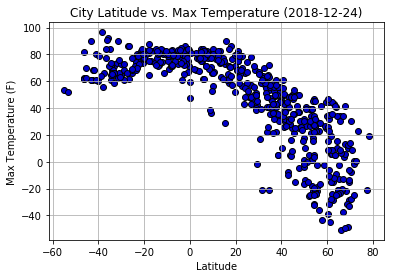

In [5]:
#Latitude vs. Temperature Plot

plt.scatter(city_weather_df["Lat"], city_weather_df["Max_Temp"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#take first entry in date list for title of chart
title_date = city_weather_df["Date"].iloc[0]

plt.title(F"City Latitude vs. Max Temperature ({title_date})")
plt.savefig("Latitude_vs_Temp.png")
plt.show()

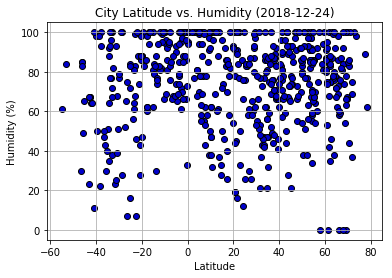

In [6]:
#Latitude vs. Humidity

plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
title_date = city_weather_df["Date"].iloc[0]
plt.title(F"City Latitude vs. Humidity ({title_date})")
plt.savefig("Latitude_vs_Humidity.png")
plt.show()


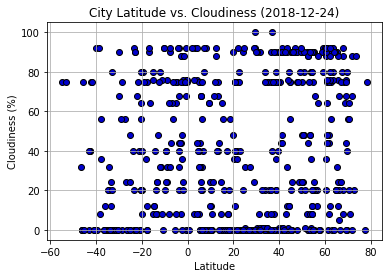

In [7]:
#Latitude vs. Cloudiness

plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
title_date = city_weather_df["Date"].iloc[0]
plt.title(F"City Latitude vs. Cloudiness ({title_date})")
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()


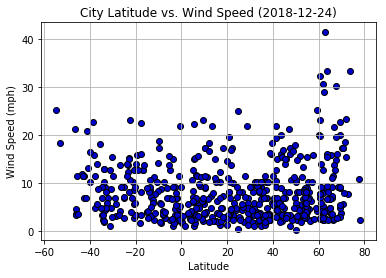

In [8]:
#Latitude vs. Windspeed

plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", facecolors="mediumblue", edgecolors="black", alpha=1)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
title_date = city_weather_df["Date"].iloc[0]
plt.title(F"City Latitude vs. Wind Speed ({title_date})")
plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()